In [ ]:
https://github.com/createmomo/CRF-Layer-on-the-Top-of-BiLSTM?tab=readme-ov-file
https://github.com/yanqiangmiffy/ner-english

# **CONNECT GOOGLE DRIVE STORAGE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **IMPORT PYTHON LIBRARIES**

In [ ]:
!pip install python-crfsuite

In [ ]:
!pip install sklearn-crfsuite

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tag import CRFTagger
import pycrfsuite

# **LOADING DATASET**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BAHAN SKRIPSI/data/riim4-antaradetik04.csv")

In [ ]:
df.head(5)

,mongo_id,portal,title,published_at_iso
0,655c312976d33e03949e2124,antara,Dinkes Mataram minta warga terapkan PHBS anti...,16/11/2023 19:03
1,6559339b76d33e03949e0eb5,antara,Sudah 1.500 lebih warga Bangladesh meninggal ...,16/11/2023 16:40
2,655c312e76d33e03949e2125,antara,Dinkes Biak tingkatkan kepaspadaan dini cegah...,15/11/2023 18:45
3,65551068926a9ddac21d1006,antara,Pemprov DKI siapkan strategi jangkau seluruh ...,15/11/2023 13:31
4,655c313476d33e03949e2126,antara,Hanya cacar air Dinkes pastikan Lombok Tengah...,15/11/2023 12:22


# **EDA (EXPLOATORY DATA ANALYSIS)**

In [ ]:
# Check the first few rows of the dataframe
df.head()

,mongo_id,portal,title,published_at_iso
0,655c312976d33e03949e2124,antara,Dinkes Mataram minta warga terapkan PHBS anti...,16/11/2023 19:03
1,6559339b76d33e03949e0eb5,antara,Sudah 1.500 lebih warga Bangladesh meninggal ...,16/11/2023 16:40
2,655c312e76d33e03949e2125,antara,Dinkes Biak tingkatkan kepaspadaan dini cegah...,15/11/2023 18:45
3,65551068926a9ddac21d1006,antara,Pemprov DKI siapkan strategi jangkau seluruh ...,15/11/2023 13:31
4,655c313476d33e03949e2126,antara,Hanya cacar air Dinkes pastikan Lombok Tengah...,15/11/2023 12:22


In [ ]:
# Misal df sudah ada dengan kolom 'publish_at_iso'
# Mengonversi kolom 'publish_at_iso' menjadi datetime
df['published_at_iso'] = pd.to_datetime(df['published_at_iso'])

# Menampilkan tanggal awal dan tanggal akhir dari seluruh data
tanggal_awal = df['published_at_iso'].min()
tanggal_akhir = df['published_at_iso'].max()

print(f"Tanggal awal data: {tanggal_awal}")
print(f"Tanggal akhir data: {tanggal_akhir}")

Tanggal awal data: 2012-01-18 07:00:00
Tanggal akhir data: 2023-11-16 19:03:00


<ipython-input-8-8393241497b4>:3: UserWarning: Parsing dates in  %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['published_at_iso'] = pd.to_datetime(df['published_at_iso'])


In [ ]:
# Get information about the dataframe, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   mongo_id          1592 non-null   object        
 1   portal            1592 non-null   object        
 2   title             1592 non-null   object        
 3   published_at_iso  1592 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 49.9+ KB


In [ ]:
# Get descriptive statistics of numerical columns
df.describe()

,published_at_iso
count,1592
mean,2021-09-30 02:16:03.090452480
min,2012-01-18 07:00:00
25%,2020-09-04 11:56:00
50%,2021-08-20 16:33:00
75%,2022-09-27 22:16:15
max,2023-11-16 19:03:00


In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
mongo_id,0
portal,0
title,0
published_at_iso,0


In [ ]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

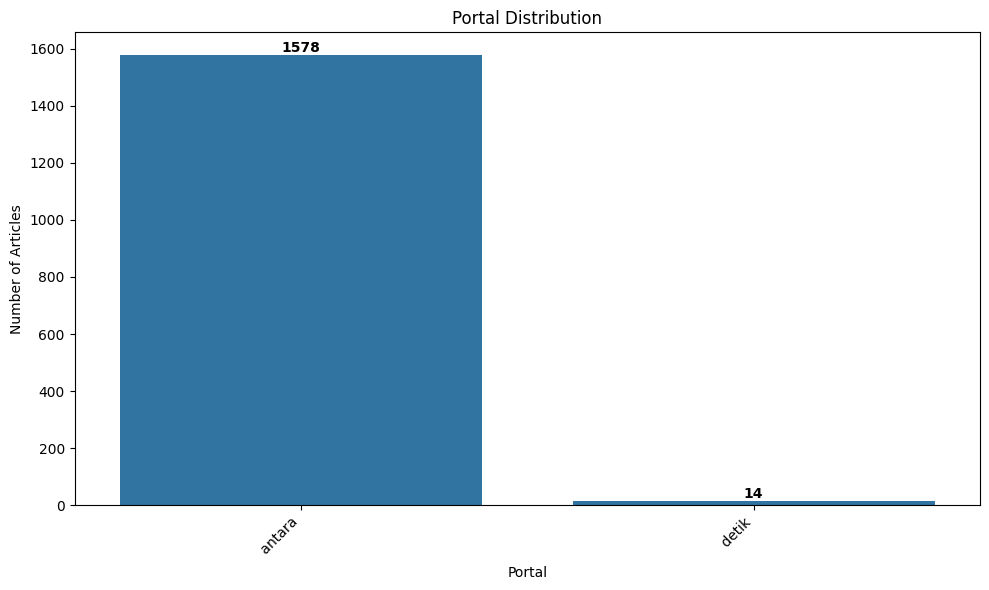

In [ ]:
# Count the number of articles per portal
portal_counts = df['portal'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=portal_counts.index, y=portal_counts.values)

# Add value labels on top of each bar
for i, v in enumerate(portal_counts.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# Set axis labels and plot title
plt.xlabel('Portal')
plt.ylabel('Number of Articles')
plt.title('Portal Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()


# **LOADING DATASET AFTER LABELING**

In [ ]:
file_path = '/content/drive/MyDrive/BAHAN SKRIPSI/data/project-2-at-2025-05-06-18-19-12a2e3af.conll'

# Buka file
with open(file_path, 'r', encoding='utf-8') as f:
    data = f.read()

print(data)

-DOCSTART- -X- O
Dinkes -X- _ B-ORG
Mataram -X- _ B-ORG
minta -X- _ O
warga -X- _ O
terapkan -X- _ O
PHBS -X- _ O
antisipasi -X- _ O
cacar -X- _ O
monyet -X- _ O

Sudah -X- _ O
1.500 -X- _ O
lebih -X- _ O
warga -X- _ O
Bangladesh -X- _ B-LOC
meninggal -X- _ O
karena -X- _ O
demam -X- _ O
berdarah -X- _ O

Dinkes -X- _ B-ORG
Biak -X- _ B-ORG
tingkatkan -X- _ O
kepaspadaan -X- _ O
dini -X- _ O
cegah -X- _ O
penyakit -X- _ O
cacar -X- _ O
monyet -X- _ O

Pemprov -X- _ B-ORG
DKI -X- _ B-ORG
siapkan -X- _ O
strategi -X- _ O
jangkau -X- _ O
seluruh -X- _ O
hewan -X- _ O
penular -X- _ O
rabies -X- _ O

Hanya -X- _ O
cacar -X- _ O
air -X- _ O
Dinkes -X- _ B-ORG
pastikan -X- _ O
Lombok -X- _ B-LOC
Tengah -X- _ B-LOC
bebas -X- _ O
cacar -X- _ O
monyet -X- _ O

Jakbar -X- _ B-LOC
vaksinasi -X- _ O
7.225 -X- _ O
hewan -X- _ O
penular -X- _ O
rabies -X- _ O
per -X- _ O
Oktober -X- _ O

Mayoritas -X- _ O
pasien -X- _ O
cacar -X- _ O
monyet -X- _ O
di -X- _ O
Jakarta -X- _ B-LOC
Selatan -X- _ B-LOC
d

# **PART OF SPEECH (POS) TAGGING**

In [ ]:
from nltk.tag import CRFTagger
import pycrfsuite

ct = CRFTagger()
ct.set_model_file('/content/drive/MyDrive/BAHAN SKRIPSI/data/all_indo_man_tag_corpus_model.crf.tagger')
hasil = ct.tag_sents([["Eks", "Manchester", "United", "Marouane", "Fellaini", "positif", "terjangkit", "COVID-19"]])
print(hasil)

[[('Eks', 'NNP'), ('Manchester', 'NNP'), ('United', 'NNP'), ('Marouane', 'NNP'), ('Fellaini', 'NNP'), ('positif', 'JJ'), ('terjangkit', 'NN'), ('COVID-19', 'NNP')]]


In [ ]:
sentence_idx = 1
data = []

with open(file_path) as f:
    for line in f:
      str = line.rstrip().split(' ')

      if len(str) == 4:
        data.append((sentence_idx, str[0], '', str[3]))

      if len(str) == 1:
        sentence_idx += 1

df = pd.DataFrame.from_records(data, columns=['Sentence #', 'Word', 'POS', 'Tag'])
df.tail(n=5)

,Sentence #,Word,POS,Tag
10318,1153,Nganjuk,,B-LOC
10319,1153,are,,O
10320,1153,dengue,,O
10321,1153,fever,,O
10322,1153,endemic,,O


In [ ]:
sentence_idx = 1
sentence = []
tag_list = []
res = []
for i, row in df.iterrows():
  if row['Sentence #'] == sentence_idx:
    sentence.append(row['Word'])
  else :
    res = ct.tag_sents([sentence])

    for tuple_word in res[0]:
      tag_list.append(tuple_word[1])

    sentence_idx += 1
    sentence = []
    sentence.append(row['Word'])

res = ct.tag_sents([sentence])

for tuple_word in res[0]:
    tag_list.append(tuple_word[1])

In [ ]:
df['POS'] = tag_list

In [ ]:
df[df['Sentence #'] == 1]
df.head()

,Sentence #,Word,POS,Tag
0,1,Dinkes,NNP,B-ORG
1,1,Mataram,NNP,B-ORG
2,1,minta,VB,O
3,1,warga,NN,O
4,1,terapkan,VB,O


In [ ]:
def remove_bio_prefix(tag):
    if tag.startswith("B-") or tag.startswith("I-"):
        return tag[2:]
    return tag

df["Tag"] = df["Tag"].apply(remove_bio_prefix)
df.head(10)

,Sentence #,Word,POS,Tag
0,1,Dinkes,NNP,ORG
1,1,Mataram,NNP,ORG
2,1,minta,VB,O
3,1,warga,NN,O
4,1,terapkan,VB,O
5,1,PHBS,NN,O
6,1,antisipasi,NN,O
7,1,cacar,JJ,O
8,1,monyet,NN,O
9,2,Sudah,MD,O


In [ ]:
# Simpan hasil ke file CSV
df.to_csv('ner_dataset.csv', index=False)

# **Modeling-oriented EDA**

In [ ]:
print("Total number of sentences in the dataset: {:,}".format(df["Sentence #"].nunique()))
print("Total words in the dataset: {:,}".format(df.shape[0]))

Total number of sentences in the dataset: 1,153
Total words in the dataset: 10,323


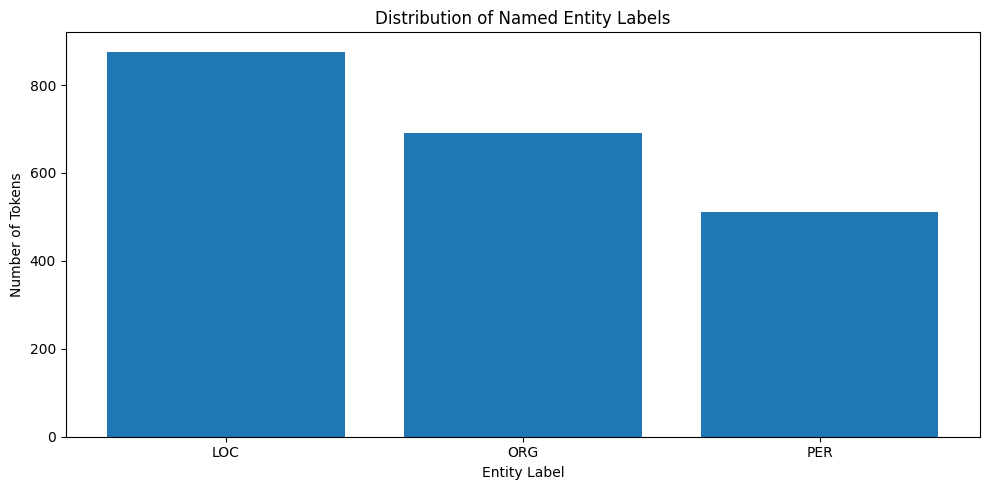

In [ ]:
# Count the number of entity labels (excluding "O")
label_counts = df[df["Tag"] != "O"]["Tag"].value_counts()

# Create the plot
plt.figure(figsize=(10, 5))
bars = plt.bar(label_counts.index, label_counts.values)

# Add title and axis labels
plt.title("Distribution of Named Entity Labels")
plt.xlabel("Entity Label")
plt.ylabel("Number of Tokens")
plt.tight_layout()
plt.show()

In [ ]:
# Get the count of all labels, including "O"
all_label_counts = df["Tag"].value_counts()

# Print the count of each label, including "O"
for label, count in all_label_counts.items():
    print(f"{label} Count: {count}")

# Print the total count of all labels, including "O"
total_count = all_label_counts.sum()
print(f"Total Labels Count: {total_count}")

O Count: 8245
LOC Count: 876
ORG Count: 690
PER Count: 512
Total Labels Count: 10323


Text(0.5, 1.0, 'Distribution of Part of Speech Tags')

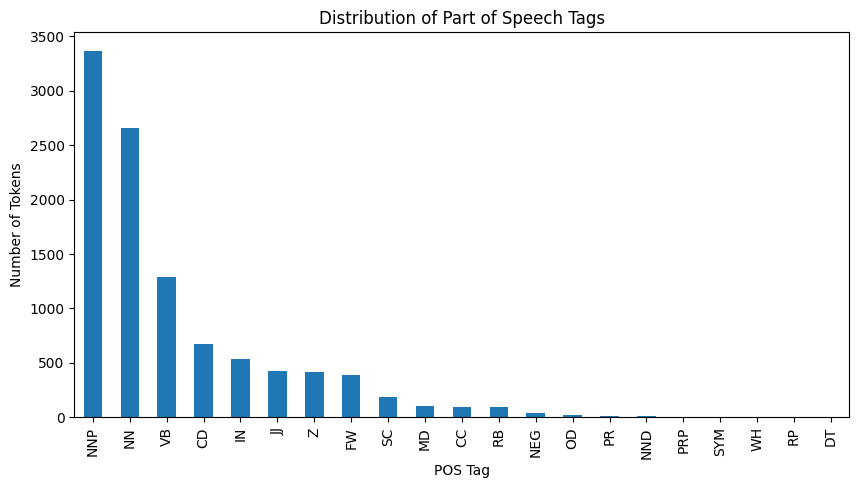

In [ ]:
df["POS"].value_counts().plot(kind="bar", figsize=(10,5));

plt.xlabel("POS Tag")
plt.ylabel("Number of Tokens")
plt.title("Distribution of Part of Speech Tags")

In [ ]:
pos_counts = df["POS"].value_counts()

# Print the count of each POS tag
for pos_tag, count in pos_counts.items():
    print(f"{pos_tag} Count: {count}")

# Print the total count of all POS tags
total_pos_count = pos_counts.sum()
print(f"Total POS Tags Count: {total_pos_count}")

NNP Count: 3370
NN Count: 2656
VB Count: 1292
CD Count: 675
IN Count: 531
JJ Count: 425
Z Count: 412
FW Count: 390
SC Count: 189
MD Count: 100
CC Count: 95
RB Count: 90
NEG Count: 42
OD Count: 22
PR Count: 14
NND Count: 8
PRP Count: 4
SYM Count: 4
WH Count: 2
RP Count: 1
DT Count: 1
Total POS Tags Count: 10323


Text(0.5, 1.0, 'Word Count Distribution')

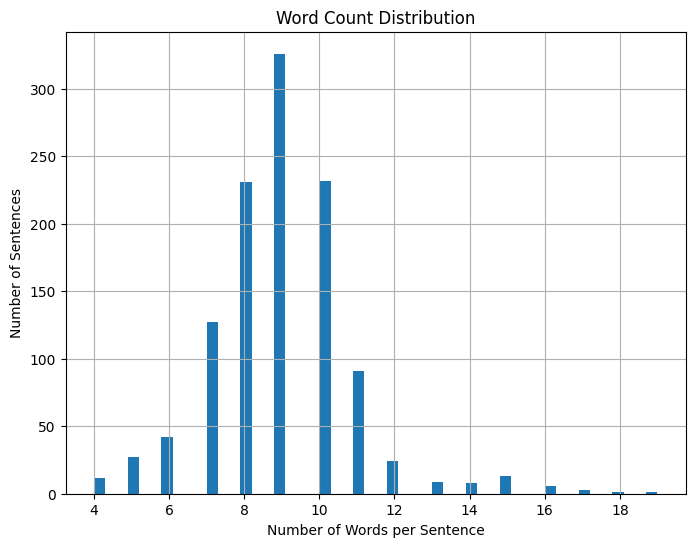

In [ ]:
word_counts = df.groupby("Sentence #")["Word"].agg(["count"])
word_counts = word_counts.rename(columns={"count": "Word count"})
word_counts.hist(bins=50, figsize=(8,6));

plt.xlabel("Number of Words per Sentence")
plt.ylabel("Number of Sentences")
plt.title("Word Count Distribution")

In [ ]:
word_counts = df.groupby("Sentence #")["Word"].agg(["count"])
word_counts = word_counts.rename(columns={"count": "Word count"})
max_length = word_counts["Word count"].max()

print("Maximum sentence length (number of words):", max_length)

Maximum sentence length (number of words): 19


In [ ]:
all_words = list(set(df["Word"].values))
all_tags = list(set(df["Tag"].values))

print("Number of unique words: {}".format(len(all_words)))
print("Number of unique tags: {}".format(len(all_tags)))

Number of unique words: 3411
Number of unique tags: 4


In [ ]:
# Filter hanya baris dengan tag selain 'O'
df = df[df['Tag'] != 'O']

# Reset index jika perlu
df = df.reset_index(drop=True)

# Lihat hasilnya
print(df)

      Sentence #           Word  POS  Tag
0              1         Dinkes  NNP  ORG
1              1        Mataram  NNP  ORG
2              2     Bangladesh  NNP  LOC
3              3         Dinkes  NNP  ORG
4              3           Biak  NNP  ORG
...          ...            ...  ...  ...
2073        1149  Cianjur-Jabar  NNP  LOC
2074        1150           IDAI  NNP  ORG
2075        1151       Kemenkes  NNP  ORG
2076        1152         Malang  NNP  LOC
2077        1153        Nganjuk   FW  LOC

[2078 rows x 4 columns]


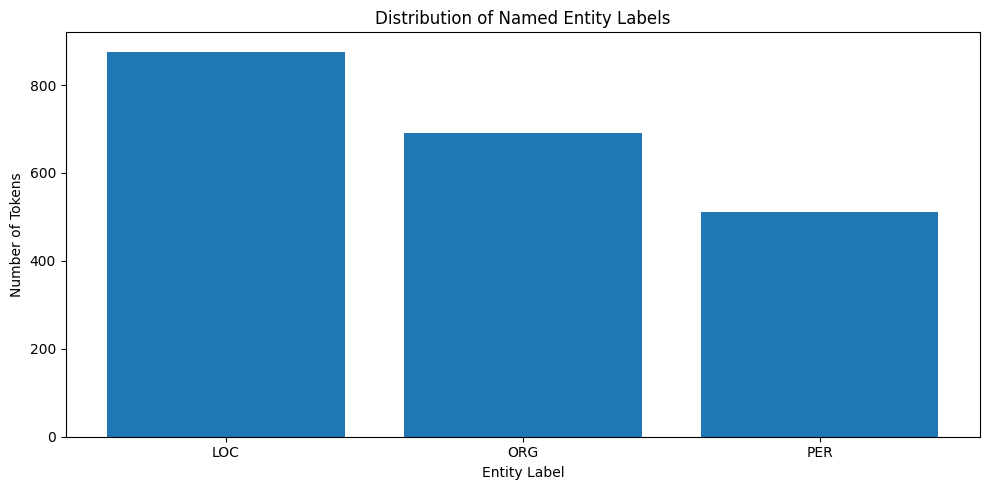

In [ ]:
# Count the number of entity labels (excluding "O")
label_counts = df[df["Tag"] != "O"]["Tag"].value_counts()

# Create the plot
plt.figure(figsize=(10, 5))
bars = plt.bar(label_counts.index, label_counts.values)

# Add title and axis labels
plt.title("Distribution of Named Entity Labels")
plt.xlabel("Entity Label")
plt.ylabel("Number of Tokens")
plt.tight_layout()
plt.show()

In [ ]:
# Get the count of all labels, including "O"
all_label_counts = df["Tag"].value_counts()

# Print the count of each label, including "O"
for label, count in all_label_counts.items():
    print(f"{label} Count: {count}")

# Print the total count of all labels, including "O"
total_count = all_label_counts.sum()
print(f"Total Labels Count: {total_count}")

LOC Count: 876
ORG Count: 690
PER Count: 512
Total Labels Count: 2078


Text(0.5, 1.0, 'Distribution of Part of Speech Tags')

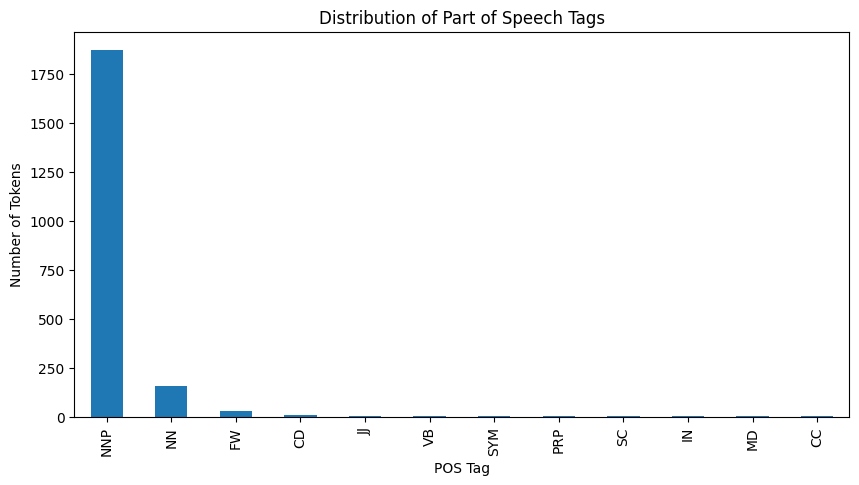

In [ ]:
df["POS"].value_counts().plot(kind="bar", figsize=(10,5));

plt.xlabel("POS Tag")
plt.ylabel("Number of Tokens")
plt.title("Distribution of Part of Speech Tags")

In [ ]:
pos_counts = df["POS"].value_counts()

# Print the count of each POS tag
for pos_tag, count in pos_counts.items():
    print(f"{pos_tag} Count: {count}")

# Print the total count of all POS tags
total_pos_count = pos_counts.sum()
print(f"Total POS Tags Count: {total_pos_count}")

NNP Count: 1874
NN Count: 158
FW Count: 27
CD Count: 7
JJ Count: 3
VB Count: 3
SYM Count: 1
PRP Count: 1
SC Count: 1
IN Count: 1
MD Count: 1
CC Count: 1
Total POS Tags Count: 2078
